#LogisticRegression(), LinearSVC() Parameter 설명
https://woolulu.tistory.com/22

In [1]:
!python3 -m pip install mglearn

/usr/local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


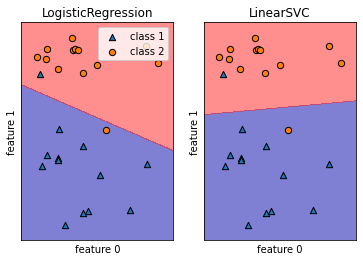

In [2]:
from mglearn.plots import plot_2d_separator

from mglearn.datasets import make_forge

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.svm import LinearSVC

import numpy as np



x, y = make_forge()



_, axes = plt.subplots(1, 2)

models = [LogisticRegression(), LinearSVC()]



for model, axe in zip(models, axes.ravel()):

    clf = model.fit(x, y)

    plot_2d_separator(clf, x, fill=True, eps=0.5, ax=axe, alpha=0.5) # eps: epsilon, ax:그림객체



    idx_set = []

    for i in np.unique(y):

        idx = np.where(y==i)[0] # np.where는 array의 index를 출력결과를 tuple형태로 리턴합니다.

        idx_set.append(idx)



    axe.scatter(x[idx_set[0]][:, 0], x[idx_set[0]][:, 1],

                label='class {}'.format(1), s=40, marker='^', edgecolors='k')

    axe.scatter(x[idx_set[1]][:, 0], x[idx_set[1]][:, 1],

                label='class {}'.format(2), s=40, edgecolors='k')

    axe.set_title('{}'.format(clf.__class__.__name__))

    axe.set_xlabel('feature 0')

    axe.set_ylabel('feature 1')

axes[0].legend(loc=1)

plt.show()

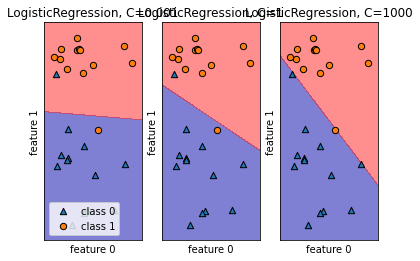

In [3]:
c_set = [0.001, 1, 1000]

_, axes = plt.subplots(1, 3)



for c_arg, axe in zip(c_set, axes.ravel()):

    params = {'C':c_arg}

    clf = LogisticRegression(**params).fit(x, y)



    plot_2d_separator(clf, x, fill=True, ax=axe, eps=0.5, alpha=0.5)



    idx_set = []

    for i in np.unique(y): # np.unique: 유일한 값만 리턴

        idx = np.where(y==i)[0]

        idx_set.append(idx)



    axe.scatter(x[idx_set[0]][:, 0], x[idx_set[0]][:, 1], s=40, edgecolors='k', # edgecolors='k' : 'k'=black

                label='class 0', marker='^')

    axe.scatter(x[idx_set[1]][:, 0], x[idx_set[1]][:, 1], s=40, edgecolors='k',

                label='class 1', marker='o')

    axe.set_title('{}, C={}'.format(clf.__class__.__name__, c_arg))

    axe.set_xlabel('feature 0')

    axe.set_ylabel('feature 1')

axes[0].legend(loc=3)

plt.show()

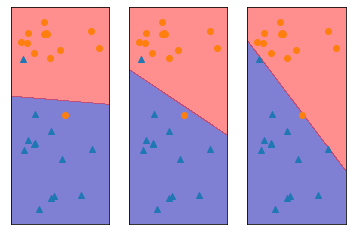

In [4]:
c_set = [0.001, 1, 1000]
_, axes = plt.subplots(1, 3)

for c_arg, axe in zip(c_set, axes.ravel()):
    params = {'C':c_arg}
    clf = LogisticRegression(**params).fit(x, y)
    plot_2d_separator(clf, x, fill=True, ax=axe, eps=0.5, alpha=0.5)
    idx_set = []
    for i in np.unique(y): # np.unique: 유일한 값만 리턴
        idx = np.where(y==i)[0]
        idx_set.append(idx)
    axe.scatter(x[idx_set[0]][:, 0], x[idx_set[0]][:, 1], marker='^')
    axe.scatter(x[idx_set[1]][:, 0], x[idx_set[1]][:, 1], marker='o')
plt.show()

#breast cancer dataset LogisticRegression decision boundary

In [1]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
x_train = cancer.data
y_train = cancer.target

In [4]:
import pandas as pd
df = pd.DataFrame(x_train)
df

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

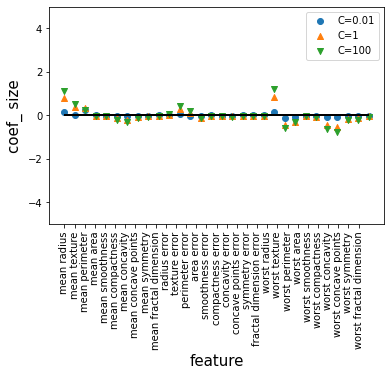

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

C_set = [0.01, 1, 100]

n_feature = cancer.data.shape[1]

line = np.linspace(0, n_feature, num=n_feature).reshape(-1, 1)

marker_set = ['o', '^', 'v']



for c_args, m in zip(C_set, marker_set):

    params = {'C':c_args}

    logreg = LogisticRegression(**params).fit(x_train, y_train)

    plt.scatter(line, logreg.coef_, marker=m, label='C={}'.format(c_args))



plt.hlines(0, xmin=np.min(line), xmax=n_feature, lw=2, color='k')

plt.xticks(np.arange(n_feature), cancer.feature_names, rotation=90, ha='center') # ha: horizon alignment

plt.ylim(-5, 5)

plt.xlabel('feature', size=15)

plt.ylabel('coef_ size', size=15)

plt.legend(loc=1)

plt.show()

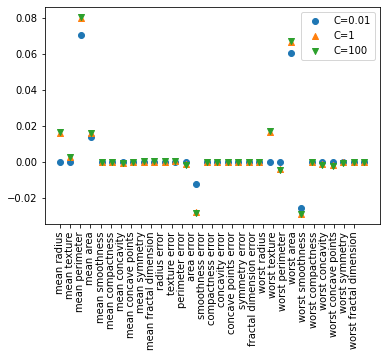

In [7]:
C_set = [0.01, 1, 100]
n_feature = cancer.data.shape[1]
line = np.linspace(0, n_feature, num=n_feature).reshape(-1, 1)
marker_set = ['o', '^', 'v']
for c_args, m in zip(C_set, marker_set):
    params = {'C':c_args, 'penalty':'l1', 'solver':'saga', 'max_iter':5000}
    # params = {'C':c_args}
    logreg = LogisticRegression(**params).fit(x_train, y_train)
    # plt.scatter(line, logreg.coef_, marker=m, label='C={}'.format(c_args))
    plt.scatter(line, logreg.coef_, marker=m, label='C={}'.format(c_args))
# plt.hlines(0, xmin=np.min(line), xmax=n_feature, lw=2, color='k')
plt.xticks(np.arange(n_feature), cancer.feature_names, rotation=90, ha='center')
# plt.ylim(-5, 5)
# plt.xlabel('feature', size=15)
# plt.ylabel('coef_ size', size=15)
# plt.legend(loc=1)
plt.legend()
plt.show()

##class weight

In [8]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

label = [0] * 100 + [1] * 50 + [2] * 5
compute_class_weight(class_weight = "balanced" , 
                     classes=np.unique(label), 
                     y = label)

array([ 0.51666667,  1.03333333, 10.33333333])

In [9]:
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report
import numpy as np
import pandas as pd

# case: moderate imbalance
X, y = datasets.make_classification(n_samples=50*15, n_features=5, n_informative=2, n_redundant=0, random_state=1, weights=[0.8]) #,flip_y=0.1,class_sep=0.5)
np.mean(y) # 0.2

LogisticRegression(C=1e9).fit(X,y).predict(X).mean() # 0.184
(LogisticRegression(C=1e9).fit(X,y).predict_proba(X)[:,1]>0.5).mean() # 0.184 => same as first
LogisticRegression(C=1e9,class_weight={0:0.5,1:0.5}).fit(X,y).predict(X).mean() # 0.184 => same as first
LogisticRegression(C=1e9,class_weight={0:2,1:8}).fit(X,y).predict(X).mean() # 0.296 => seems to make things worse?
LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X).mean() # 0.292 => seems to make things worse?

roc_auc_score(y,LogisticRegression(C=1e9).fit(X,y).predict(X)) # 0.83
roc_auc_score(y,LogisticRegression(C=1e9,class_weight={0:2,1:8}).fit(X,y).predict(X)) # 0.86 => about the same
roc_auc_score(y,LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X)) # 0.86 => about the same

# case: strong imbalance
X, y = datasets.make_classification(n_samples=50*15, n_features=5, n_informative=2, n_redundant=0, random_state=1, weights=[0.95])
np.mean(y) # 0.06

LogisticRegression(C=1e9).fit(X,y).predict(X).mean() # 0.02
(LogisticRegression(C=1e9).fit(X,y).predict_proba(X)[:,1]>0.5).mean() # 0.02 => same as first
LogisticRegression(C=1e9,class_weight={0:0.5,1:0.5}).fit(X,y).predict(X).mean() # 0.02 => same as first
LogisticRegression(C=1e9,class_weight={0:1,1:20}).fit(X,y).predict(X).mean() # 0.25 => huh??
LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X).mean() # 0.22 => huh??
(LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict_proba(X)[:,1]>0.5).mean() # same as last

roc_auc_score(y,LogisticRegression(C=1e9).fit(X,y).predict(X)) # 0.64
roc_auc_score(y,LogisticRegression(C=1e9,class_weight={0:1,1:20}).fit(X,y).predict(X)) # 0.84 => much better
roc_auc_score(y,LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X)) # 0.85 => similar to manual
roc_auc_score(y,(LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict_proba(X)[:,1]>0.5).astype(int)) # same as last

print(classification_report(y,LogisticRegression(C=1e9).fit(X,y).predict(X)))
pd.crosstab(y,LogisticRegression(C=1e9).fit(X,y).predict(X),margins=True)
pd.crosstab(y,LogisticRegression(C=1e9).fit(X,y).predict(X),margins=True,normalize='index') # few prediced TRUE with only 28% TRUE recall and 86% TRUE precision so 6%*28%~=2%

print(classification_report(y,LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X)))
pd.crosstab(y,LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X),margins=True)
pd.crosstab(y,LogisticRegression(C=1e9,class_weight="balanced").fit(X,y).predict(X),margins=True,normalize='index') # 88% TRUE recall but also lot of false positives with only 23% TRUE precision, making total predicted % TRUE > actual % TRUE

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       707
           1       0.86      0.28      0.42        43

    accuracy                           0.96       750
   macro avg       0.91      0.64      0.70       750
weighted avg       0.95      0.96      0.95       750

              precision    recall  f1-score   support

           0       0.99      0.82      0.90       707
           1       0.23      0.88      0.36        43

    accuracy                           0.82       750
   macro avg       0.61      0.85      0.63       750
weighted avg       0.95      0.82      0.87       750



col_0,0,1
row_0,,
0,0.818953,0.181047
1,0.116279,0.883721
All,0.778667,0.221333


In [10]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cancer.data,cancer.target, random_state=777)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [11]:
from sklearn.model_selection import GridSearchCV
grid_values = {'C': [0.001,0.01,0.1,1,10,100,1000], 'max_iter':[500, 5000]}
gscv = GridSearchCV(lr, param_grid=grid_values)

In [12]:
gscv.fit(x_train, y_train)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [500, 5000]})

In [13]:
gscv.cv_results_

{'mean_fit_time': array([0.08173785, 0.07410922, 0.14189868, 0.14170542, 0.20761881,
        0.30700569, 0.32657151, 1.22378383, 0.34380684, 1.53358378,
        0.22816124, 1.64932256, 0.22508798, 2.53578668]),
 'std_fit_time': array([0.01215282, 0.00854285, 0.01298991, 0.01403489, 0.01722206,
        0.04095528, 0.07171947, 0.20021917, 0.08781843, 0.9246526 ,
        0.00737084, 0.40242402, 0.01096696, 0.39763754]),
 'mean_score_time': array([0.00058746, 0.00057917, 0.00058975, 0.0006712 , 0.00098834,
        0.00077119, 0.00095758, 0.00088077, 0.00137095, 0.00071878,
        0.00124121, 0.00060968, 0.00099511, 0.00097103]),
 'std_score_time': array([1.28303757e-05, 1.77933752e-05, 4.66618722e-06, 1.70037911e-04,
        1.18647261e-04, 3.23935195e-04, 2.86215744e-04, 3.57203085e-04,
        4.54631421e-04, 1.96663241e-04, 2.99475640e-04, 1.97190471e-05,
        6.71144531e-05, 3.49574697e-04]),
 'param_C': masked_array(data=[0.001, 0.001, 0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 100,
    

In [14]:
gscv.best_params_, gscv.best_index_, gscv.best_score_, gscv.best_estimator_

({'C': 100, 'max_iter': 500},
 10,
 0.9765253077975377,
 LogisticRegression(C=100, max_iter=500))

#Evaluation

In [15]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)

0.75

##roc

In [16]:
import numpy as np
from sklearn import metrics
y = np.array([0, 1, 2, 2, 0, 1, 2, 2, 1, 0])
# scores = np.array([0, 1, 2, 2, 0, 1, 2, 2, 1])
scores = np.array([0.6, 0.4, 0.35, 0.8, 0.5,0.4,0.8,0.8,0.9,0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=0)
fpr,tpr,thresholds

(array([0.        , 0.14285714, 0.57142857, 0.57142857, 0.85714286,
        1.        ]),
 array([0.        , 0.        , 0.33333333, 1.        , 1.        ,
        1.        ]),
 array([1.9 , 0.9 , 0.8 , 0.5 , 0.4 , 0.35]))

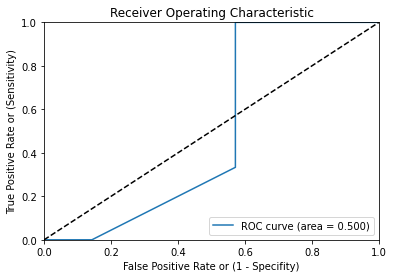

In [17]:
import matplotlib.pyplot as plt
roc_auc = metrics.auc(fpr, tpr)
# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

In [18]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=2)
fpr, tpr, thresholds

(array([0. , 0. , 0.5, 0.5, 1. ]),
 array([0. , 0.5, 0.5, 1. , 1. ]),
 array([1.8 , 0.8 , 0.4 , 0.35, 0.1 ]))

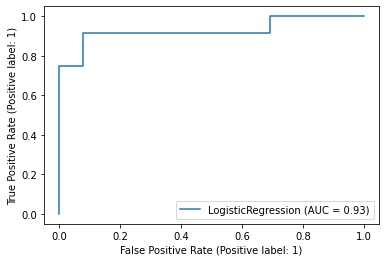

In [19]:
import matplotlib.pyplot as plt  # doctest: +SKIP
from sklearn import datasets, metrics, model_selection, linear_model
# from sklearn.linear_model import LogisticRegression
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = linear_model.LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show() 

In [20]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

import matplotlib.pyplot as plt 
from sklearn import datasets, metrics, model_selection, linear_model
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = linear_model.LogisticRegression()
clf.fit(X_train, y_train)
# y_pred_proba = clf.predict_proba(X_test)
y_pred = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))
from sklearn.metrics import roc_auc_score, classification_report
print(classification_report(y_test, y_pred))
# metrics.plot_roc_curve(clf, X_test, y_test)
# plt.show() 

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##roc, auc score

In [21]:
# y_pred_proba = clf.predict_proba(X_test)[::,1]
# fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
# auc = metrics.roc_auc_score(y_test, y_pred_proba)
# plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
# plt.legend(loc=4)
# plt.show()

In [25]:
!python3 -m pip install plot-metric

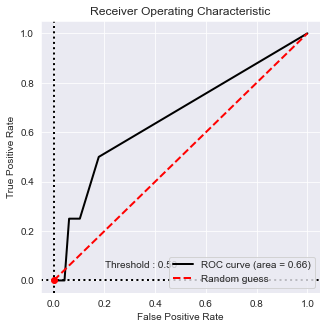

In [35]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=1000, n_classes=2, n_clusters_per_class=1, weights=[1,1], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=50, random_state=23)
model = clf.fit(X_train, y_train)

# Use predict_proba to predict probability of the class
y_pred = clf.predict_proba(X_test)[:,1]

from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_test, y_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

In [28]:
y_pred

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.12, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ,
       0.  , 0.  , 0.04, 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.04, 0.  , 0.  , 0.02, 0.  , 0.  , 0.08, 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ,
       0.04, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.

##confusion_matrix

In [29]:
from sklearn.metrics import confusion_matrix
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

#Imbalanced Classification Dataset
https://machinelearningmastery.com/cost-sensitive-logistic-regression/

Counter({0: 9900, 1: 100})


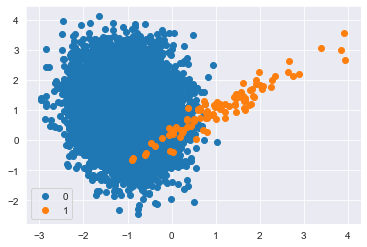

In [30]:
# define dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [31]:
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores))
from sklearn import datasets, metrics, model_selection, linear_model
# from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)


Mean ROC AUC: 0.943


In [32]:
from sklearn.linear_model import LogisticRegression
# define model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2476
           1       1.00      0.54      0.70        24

    accuracy                           1.00      2500
   macro avg       1.00      0.77      0.85      2500
weighted avg       1.00      1.00      0.99      2500



In [33]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
compute_class_weight(class_weight='balanced',classes=np.unique(y_test), y=y_test), np.unique(y_test).dtype, type(np.unique(y_test))

(array([ 0.50484653, 52.08333333]), dtype('int64'), numpy.ndarray)

In [34]:
model = LogisticRegression(solver='lbfgs',class_weight={0:0.50484653, 1:52.08333333 })
model.fit(X_train, y_train)
y_preds = model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      2476
           1       0.16      0.83      0.27        24

    accuracy                           0.96      2500
   macro avg       0.58      0.90      0.62      2500
weighted avg       0.99      0.96      0.97      2500

